## Case Study:  Testing  Hypothesis

### Hypothesis:  Articles about Climate Change are more likely to be published by "Liberal" sources

#### NOTE: This case study is not complete!  We are only using the first part of it to practice Graphic Analytics.

In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter

### Step 1:  Load data into a dataframe

In [2]:
addr1 = "./week-5/articles1.csv"
articles = pd.read_csv(addr1)

### Step 2:  check the dimension of the table/look at the data

In [3]:
print("The dimension of the table is: ", articles.shape)

The dimension of the table is:  (50000, 10)


In [4]:
#Display the data
print(articles.head(5))

   Unnamed: 0     id                                              title  \
0           0  17283  House Republicans Fret About Winning Their Hea...   
1           1  17284  Rift Between Officers and Residents as Killing...   
2           2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
3           3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
4           4  17287  Kim Jong-un Says North Korea Is Preparing to T...   

      publication                         author        date    year  month  \
0  New York Times                     Carl Hulse  2016-12-31  2016.0   12.0   
1  New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0   
2  New York Times                   Margalit Fox  2017-01-06  2017.0    1.0   
3  New York Times               William McDonald  2017-04-10  2017.0    4.0   
4  New York Times                  Choe Sang-Hun  2017-01-02  2017.0    1.0   

   url                                            content  
0  NaN  WASHIN

In [5]:
#what type of variables are in the table
print("Describe Data")
print(articles.describe())

Describe Data
         Unnamed: 0            id          year         month  url
count  50000.000000  50000.000000  50000.000000  50000.000000  0.0
mean   25694.378380  44432.454800   2016.273700      5.508940  NaN
std    15350.143677  15773.615179      0.634694      3.333062  NaN
min        0.000000  17283.000000   2011.000000      1.000000  NaN
25%    12500.750000  31236.750000   2016.000000      3.000000  NaN
50%    25004.500000  43757.500000   2016.000000      5.000000  NaN
75%    38630.250000  57479.250000   2017.000000      8.000000  NaN
max    53291.000000  73469.000000   2017.000000     12.000000  NaN


In [6]:
print("Summarized Data")
print(articles.describe(include=['O']))

Summarized Data
                                                    title publication  \
count                                               50000       50000   
unique                                              49920           5   
top     The 10 most important things in the world righ...   Breitbart   
freq                                                    7       23781   

                author        date        content  
count            43694       50000          50000  
unique            3603         983          49888  
top     Breitbart News  2016-08-22  advertisement  
freq              1559         221             42  


In [7]:
#display length of data
print(len(articles))

50000


In [8]:
#display publishers (publications)
print(articles.publication.unique())

['New York Times' 'Breitbart' 'CNN' 'Business Insider' 'Atlantic']


In [9]:
#display min, max of years published
print(articles['year'].min())

2011.0


In [10]:
print(articles['year'].max())

2017.0


In [11]:
#display how many articles from each year
print(articles['year'].value_counts())

2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64


### Step 3:  Create some bar charts to show articles

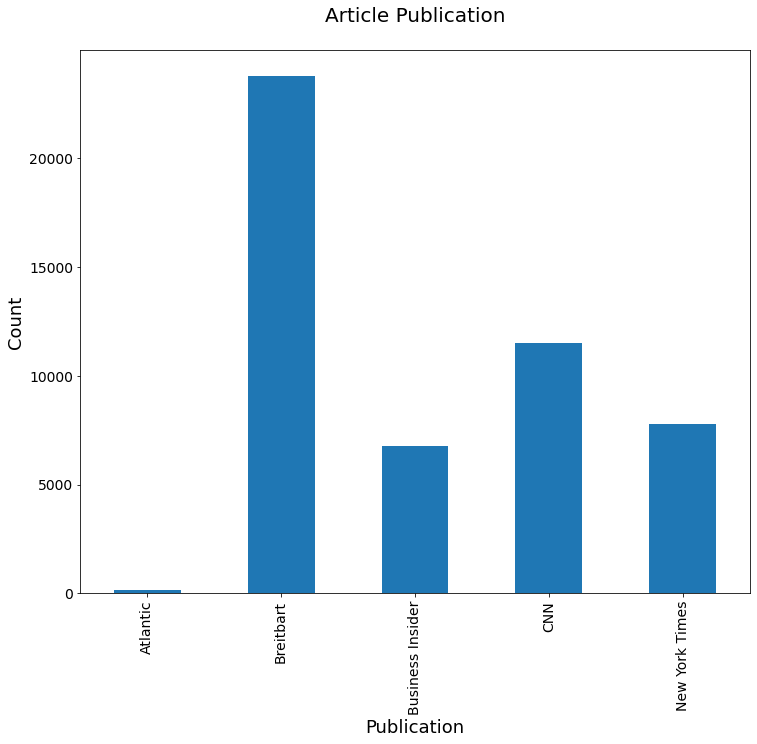

In [12]:
#display bar chart of articles sorted by Publication Name
ax = articles['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Publication\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

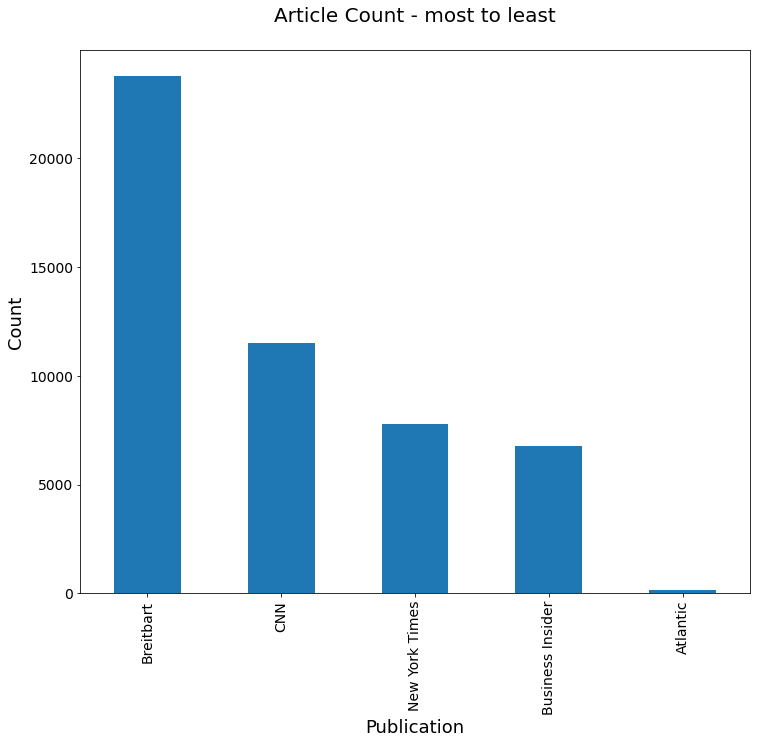

In [13]:
#display bar chart of articles sorted by counts
ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count - most to least\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

#Step 4:  clean text:  no punctuation/all lowercase

In [14]:
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))
print("clean text:  ",articles['tokenized'].head())

clean text:   0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: tokenized, dtype: object


In [15]:
#look at mean, min, max article lengths
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))
print("Mean:  ",articles['num_wds'].mean())
print("Min:  ",articles['num_wds'].min())
print("Max:  ",articles['num_wds'].max())

Mean:   636.26046
Min:   0
Max:   24736


### Step 5:  remove articles with no words

In [16]:
len(articles[articles['num_wds']==0])
articles = articles[articles['num_wds']>0]
print("new mean:  ",articles['num_wds'].mean())
print("new min:  ",articles['num_wds'].min())

new mean:   637.0886752778612
new min:   1


### Step 6:  Check for Outliers:  show bar graph of outliers

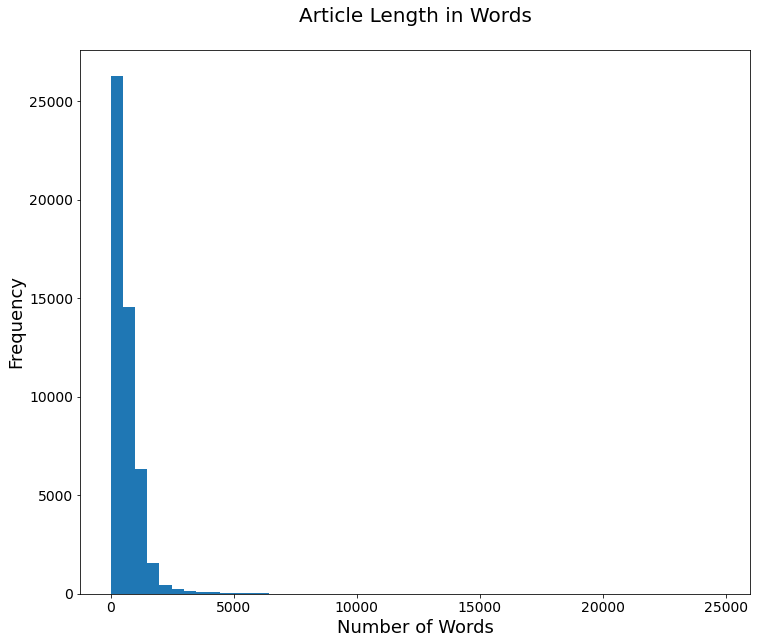

In [17]:
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);
plt.show()


